In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
%matplotlib inline


In [2]:
df = pd.read_csv(r"C:\Users\GREEN ZONME\Documents\SPAM CLASSIFIER\spam.csv" , encoding='latin1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [6]:
df.rename(columns={"v1":"label","v2":"text"},inplace=True)

In [7]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df["label"].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

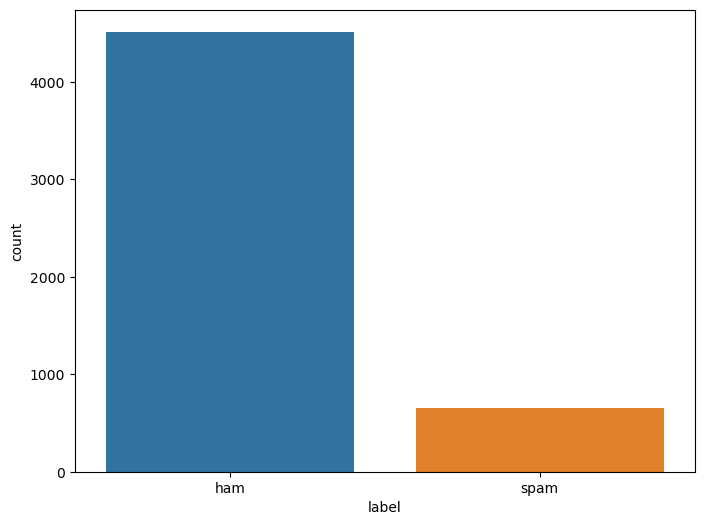

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x="label",data=df)
plt.show()


In [17]:
df['label'].replace({"ham": 0, "spam": 1}, inplace=True)

In [18]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to C:\Users\GREEN
[nltk_data]     ZONME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df["text"]=df["text"].apply(clean_text)

C:\anaconda\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [21]:
df['number_character']=df['text'].apply(len)
df['number_of_words'] = df['text'].apply(lambda x: len(x.split()))
df['number_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,label,text,number_character,number_of_words,number_sentence
0,0,go jurong point crazy available bugis n great ...,82,16,1
1,0,ok lar joking wif u oni,23,6,1
2,1,free entry wkly comp win fa cup final tkts st ...,101,21,1
3,0,u dun say early hor u c already say,35,9,1
4,0,nah think goes usf lives around though,38,7,1


In [23]:
df.describe()

,label,number_character,number_of_words,number_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,48.267557,8.691236,0.998646
std,0.332253,36.666598,6.350770,0.036778
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,4.000000,1.000000
50%,0.000000,37.000000,7.000000,1.000000
75%,0.000000,71.000000,12.000000,1.000000
max,1.000000,447.000000,73.000000,1.000000


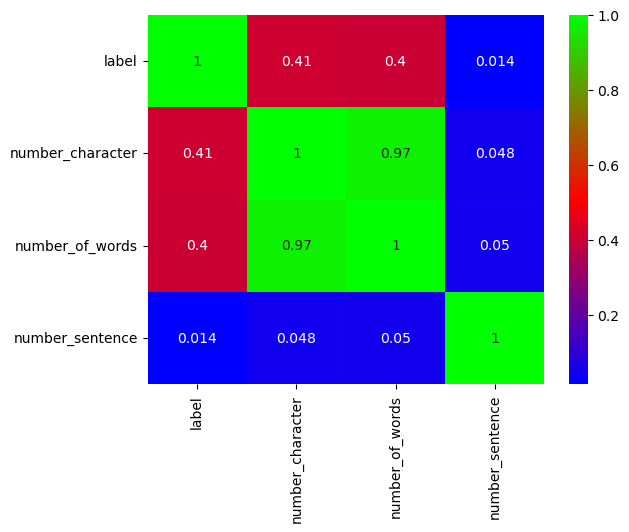

In [24]:
corr=df.select_dtypes(["int"]).corr()
sns.heatmap(corr,annot=True,cmap="brg")
plt.show()

In [25]:
df[["number_character","number_of_words","number_sentence"]].describe()

,number_character,number_of_words,number_sentence
count,5169.000000,5169.000000,5169.000000
mean,48.267557,8.691236,0.998646
std,36.666598,6.350770,0.036778
min,0.000000,0.000000,0.000000
25%,21.000000,4.000000,1.000000
50%,37.000000,7.000000,1.000000
75%,71.000000,12.000000,1.000000
max,447.000000,73.000000,1.000000


In [26]:
df[df["label"]==0][["number_character","number_of_words","number_sentence"]].describe()

,number_character,number_of_words,number_sentence
count,4516.000000,4516.000000,4516.000000
mean,42.524579,7.717671,0.998450
std,34.595643,5.960242,0.039344
min,0.000000,0.000000,0.000000
25%,19.000000,4.000000,1.000000
50%,32.000000,6.000000,1.000000
75%,56.000000,10.000000,1.000000
max,447.000000,73.000000,1.000000


In [27]:
df[df["label"]==1][["number_character","number_of_words","number_sentence"]].describe()

,number_character,number_of_words,number_sentence
count,653.000000,653.000000,653.0
mean,87.984686,15.424196,1.0
std,23.667749,4.660482,0.0
min,4.000000,1.000000,1.0
25%,77.000000,13.000000,1.0
50%,92.000000,16.000000,1.0
75%,104.000000,19.000000,1.0
max,142.000000,26.000000,1.0


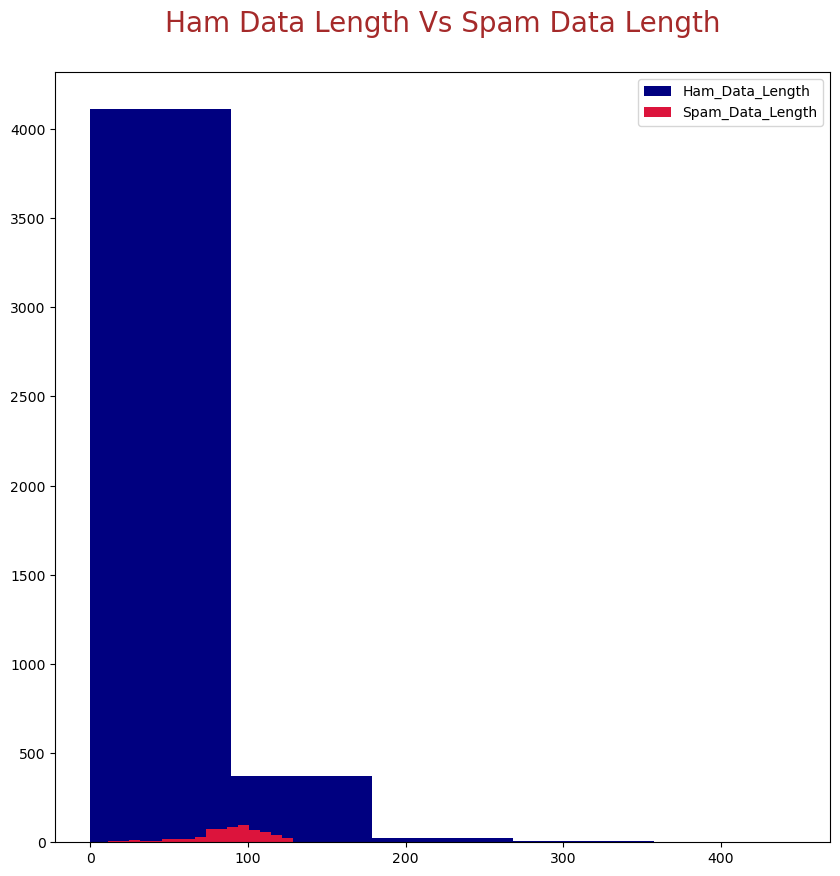

In [28]:
ham_data_len=df[df["label"]==0]["text"].str.len()
spam_data_len=df[df["label"]==1]["text"].str.len()
plt.figure(figsize=(10,10))
plt.hist(ham_data_len, bins=5,label='Ham_Data_Length',color="navy")
plt.hist(spam_data_len , bins=20, label='Spam_Data_Length',color="crimson")
plt.title("Ham Data Length Vs Spam Data Length\n",fontsize=20,color="brown")
plt.legend()
plt.show()

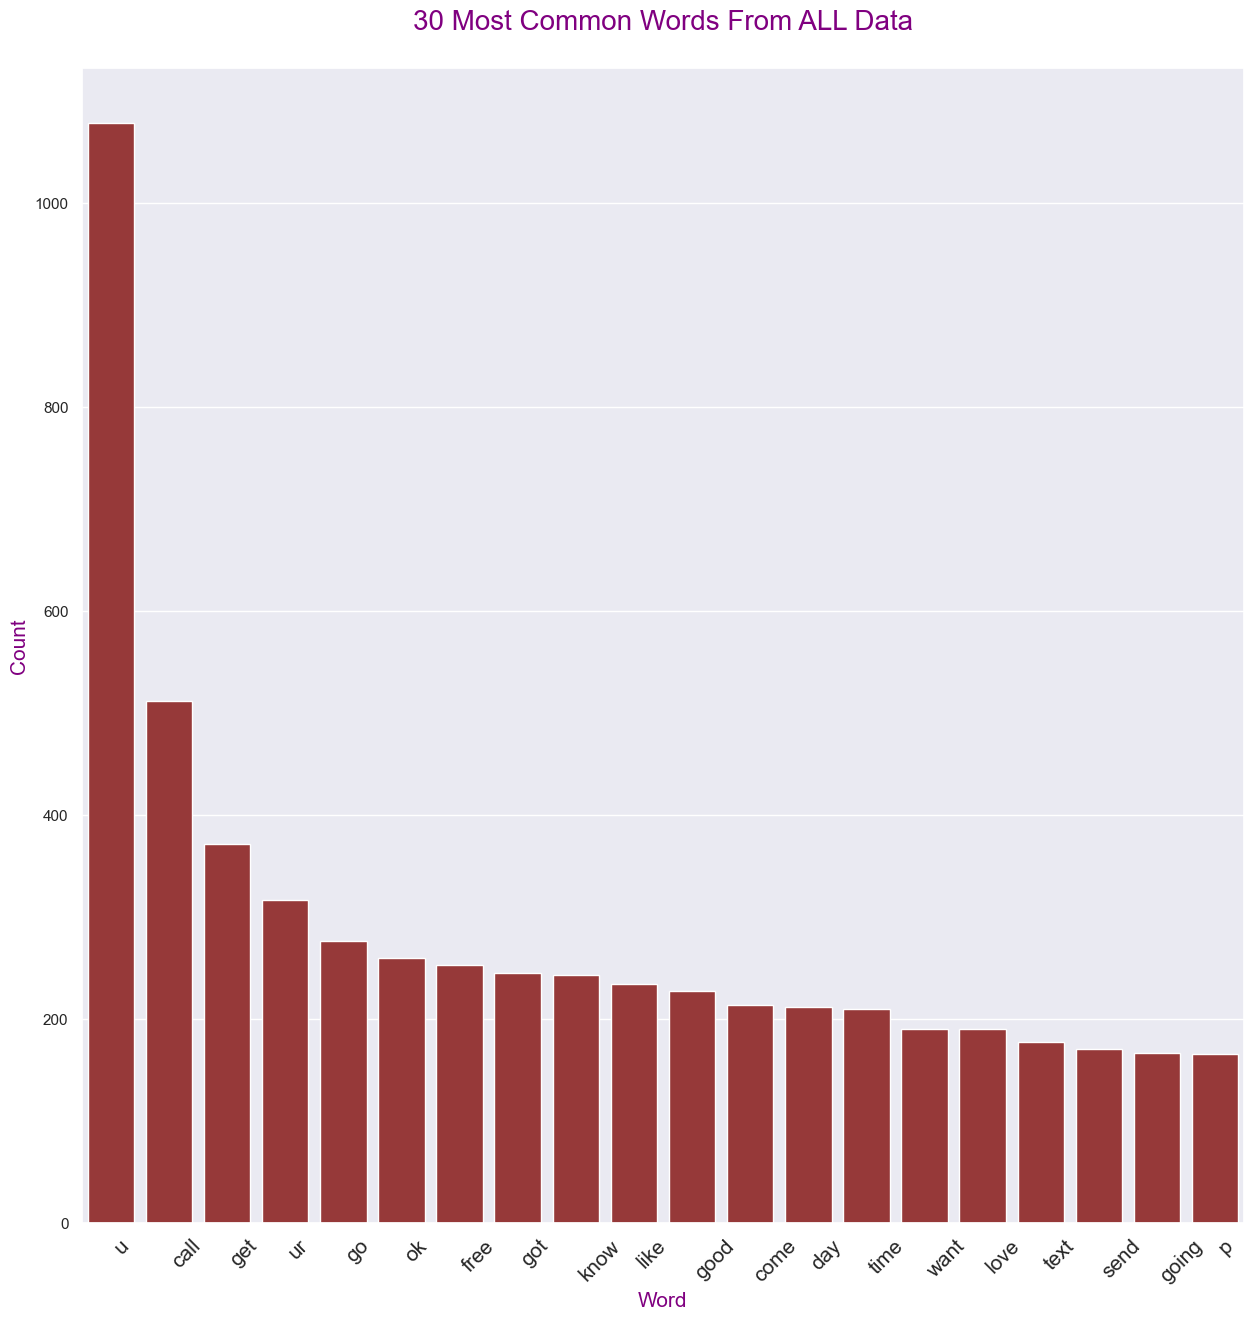

In [31]:
from collections import Counter
stop_words = set(stopwords.words('english'))


most_common_text = " ".join(df["text"].values.tolist())
most_common_text = most_common_text.translate(str.maketrans('', '', string.punctuation))
word_freq = most_common_text.split()
word_freq = [word for word in word_freq if word.lower() not in stop_words]

count_words = Counter(word_freq)
most_common_words = count_words.most_common(20)

data_frame = pd.DataFrame(most_common_words, columns=['Word', 'Count'])


sns.set(style="dark")
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.barplot(x="Word", y="Count", data=data_frame, color="brown")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="left", fontsize=15)
plt.title("30 Most Common Words From ALL Data\n", fontsize=20, color="purple")
plt.xlabel("Word", fontsize=15, color="purple")
plt.ylabel("Count", fontsize=15, color="purple")

plt.show()

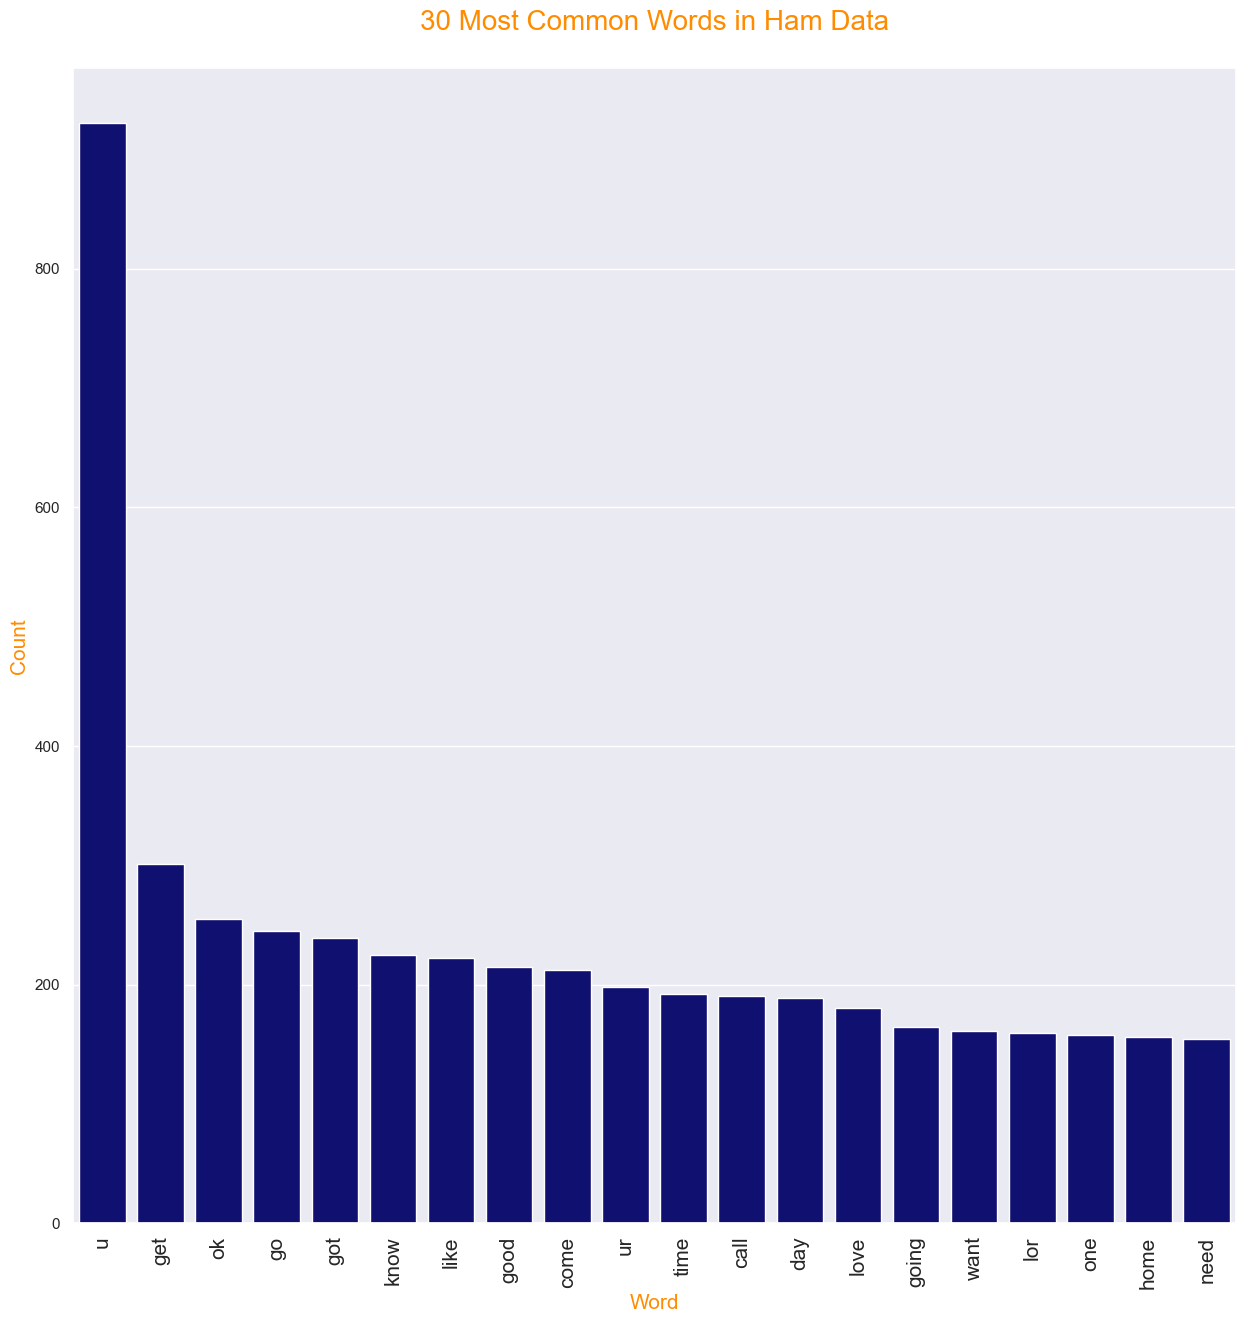

In [32]:
most_common_ham_word=df[df["label"]==0]
most_common_ham_text=" ".join(most_common_ham_word["text"].values.tolist())
most_common_ham_text = most_common_ham_text.translate(str.maketrans('', '', string.punctuation))
ham_word_freq=most_common_ham_text.split()
ham_word_freq=[word for word in ham_word_freq if word.lower() not in stop_words]
count_ham_words=Counter(ham_word_freq)
most_common_words_ham = count_ham_words.most_common(20)
ham_data_frame = pd.DataFrame(most_common_words_ham, columns=['Word', 'Count'])
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.barplot(x="Word", y="Count", data=ham_data_frame,color="navy")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center",fontsize=15)
plt.title("30 Most Common Words in Ham Data\n", fontsize=20,color="darkorange")
plt.xlabel("Word",fontsize=15,color="darkorange")
plt.ylabel("Count",fontsize=15,color="darkorange")

plt.show()

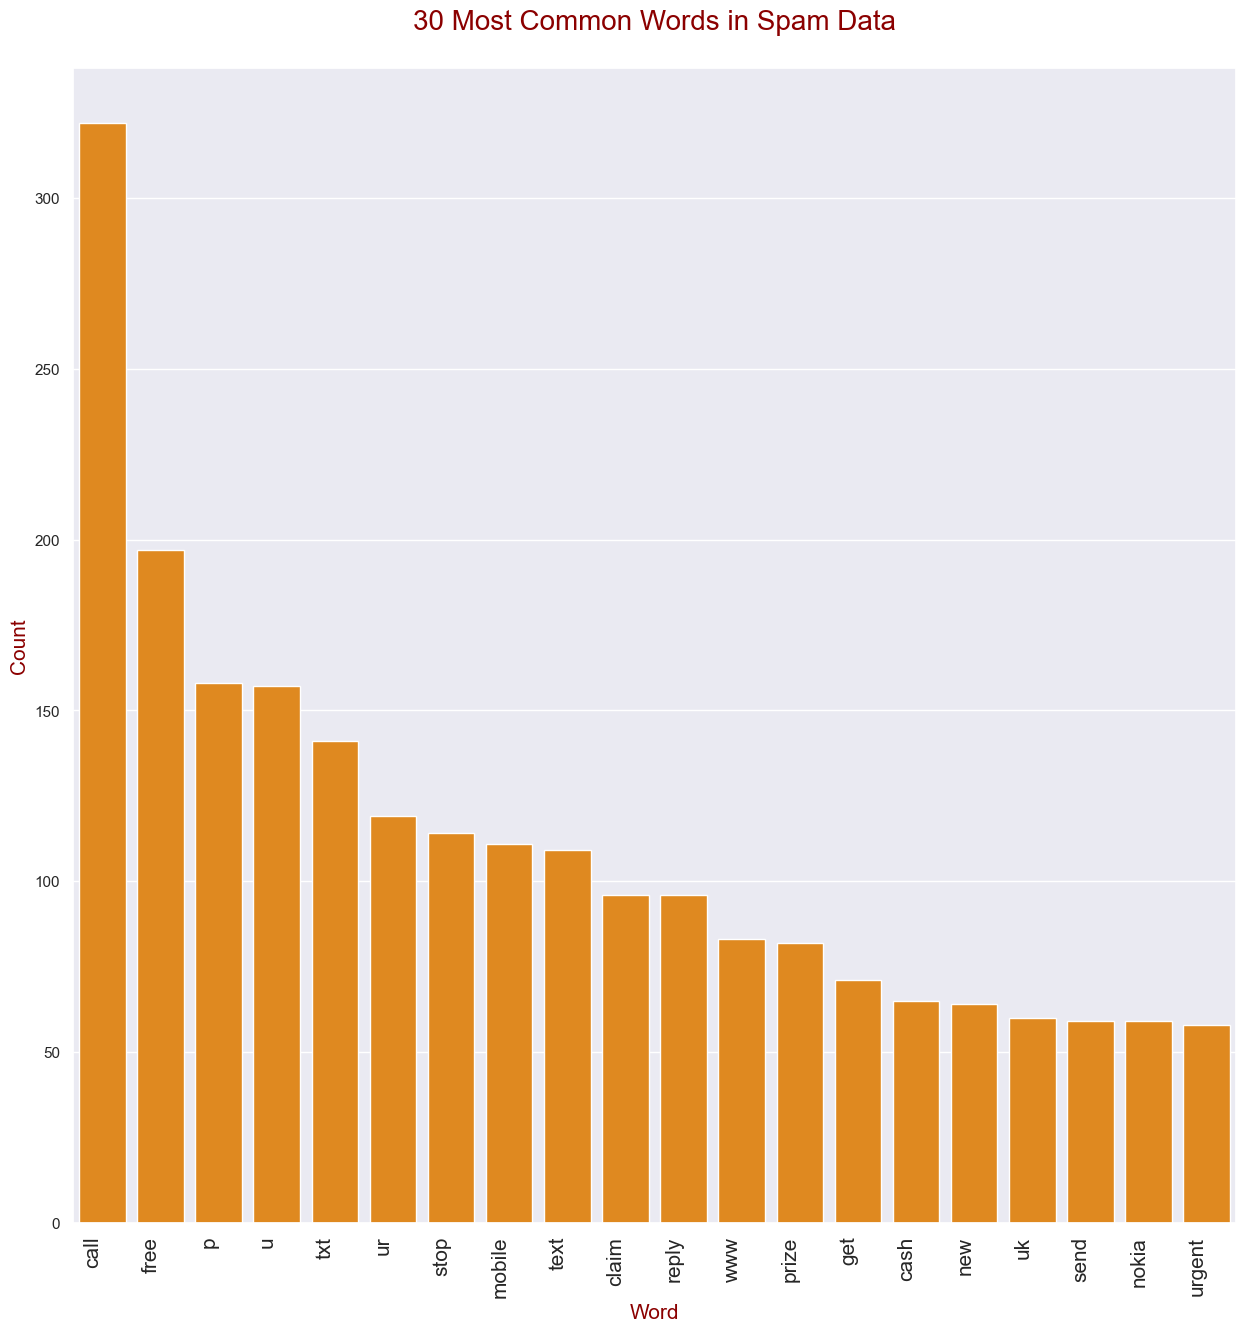

In [33]:
most_common_spam_word=df[df["label"]==1]
most_common_spam_text = " ".join(most_common_spam_word["text"].values.tolist())
most_common_spam_text = most_common_spam_text.translate(str.maketrans('', '', string.punctuation))
spam_word_freq = most_common_spam_text.split()
spam_word_freq = [word for word in spam_word_freq if word.lower() not in stop_words]
count_spam_words = Counter(spam_word_freq)
most_common_words_spam = count_spam_words.most_common(20)
spam_data_frame = pd.DataFrame(most_common_words_spam, columns=['Word', 'Count'])
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.barplot(x="Word", y="Count", data=spam_data_frame, color="darkorange")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=15)
plt.title("30 Most Common Words in Spam Data\n", fontsize=20, color="darkred")
plt.xlabel("Word", fontsize=15, color="darkred")
plt.ylabel("Count", fontsize=15, color="darkred")
plt.show()

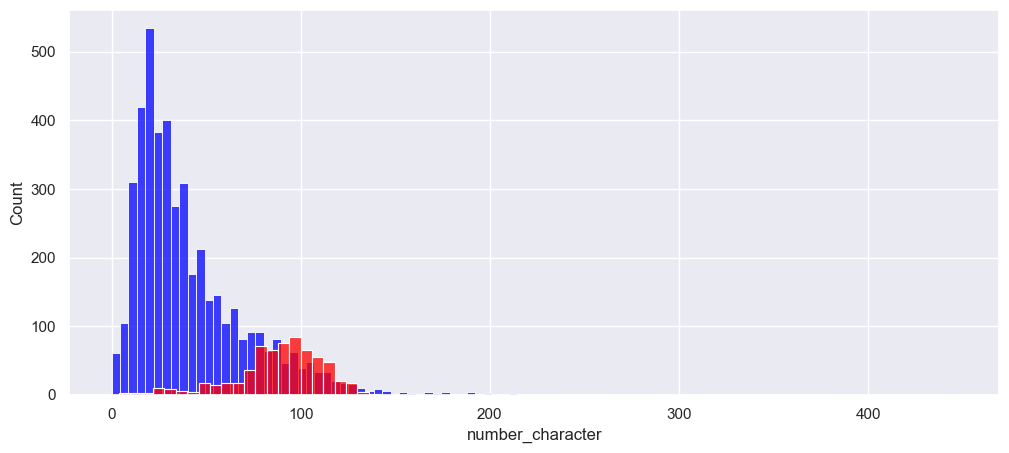

In [34]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["label"]==0]["number_character"],color="blue")
sns.histplot(df[df["label"]==1]["number_character"], color="red")
plt.show()

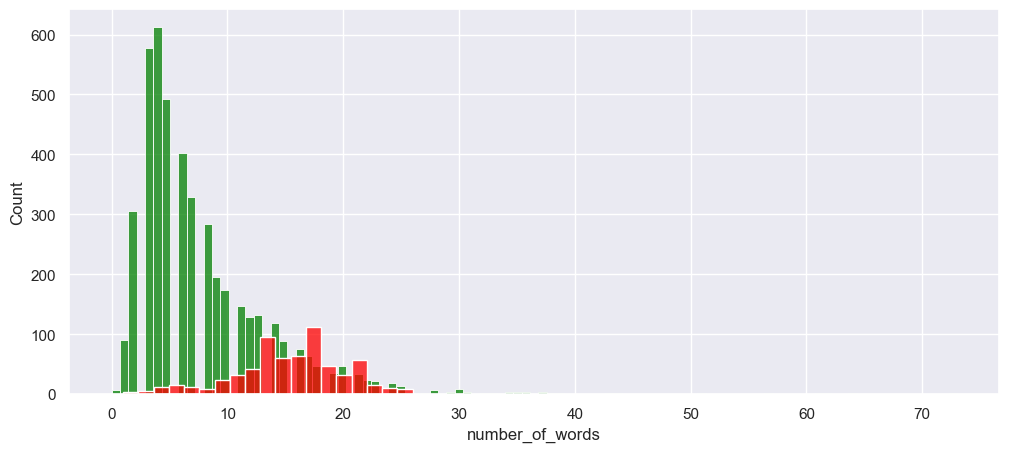

In [35]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["label"]==0]["number_of_words"],color="green")
sns.histplot(df[df["label"]==1]["number_of_words"], color="red")
plt.show()

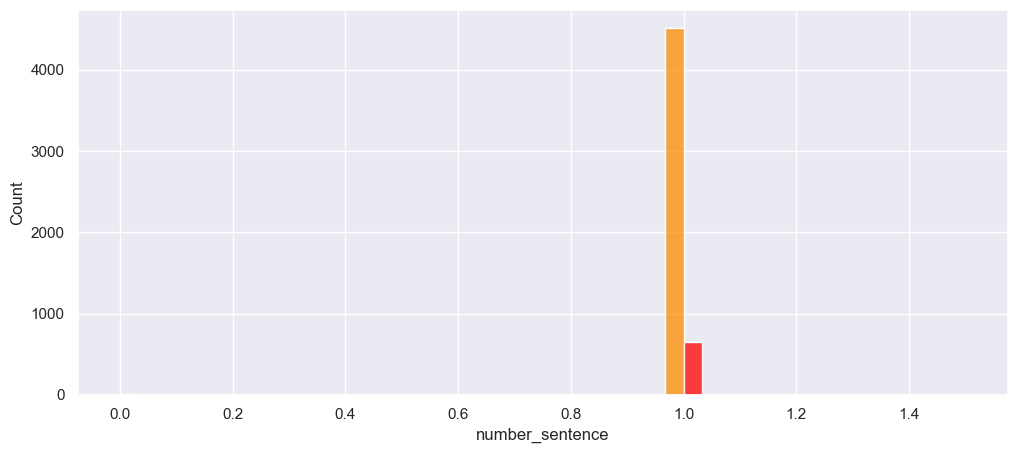

In [36]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["label"]==0]["number_sentence"],color="darkorange",bins=30)
sns.histplot(df[df["label"]==1]["number_sentence"], color="red",bins=30)
plt.show()

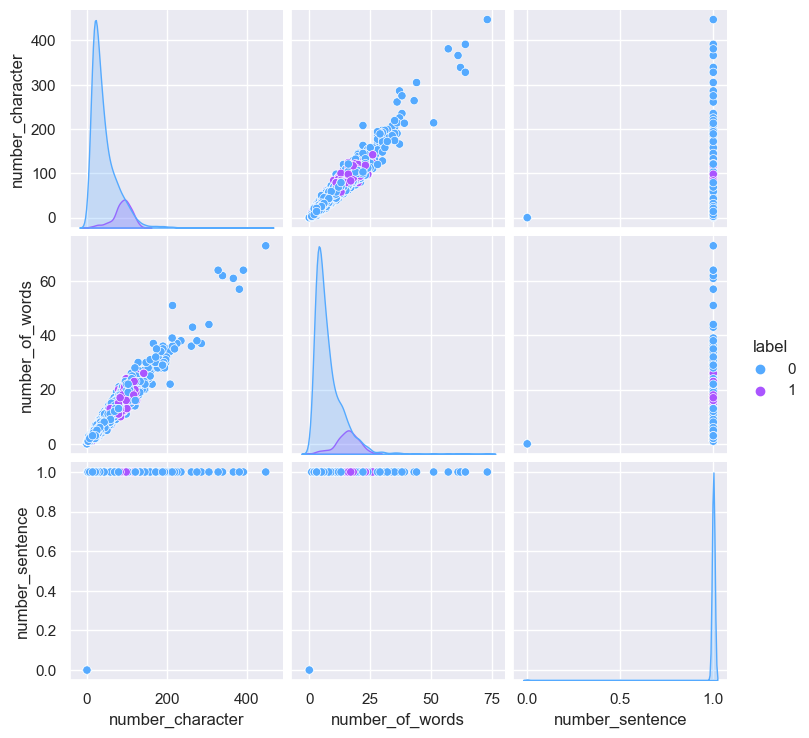

In [37]:
sns.pairplot(df,hue="label",palette="cool")
plt.show()

In [38]:
df.drop(columns=["number_character","number_of_words","number_sentence"],axis=1,inplace=True)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X=tf.fit_transform(df["text"])
Y=df["label"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [41]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

In [42]:
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
pred1=svm.predict(X_test)
acc0=accuracy_score(y_test,pred1)
print("Accuracy score :",acc0)

Accuracy score : 0.9816247582205029


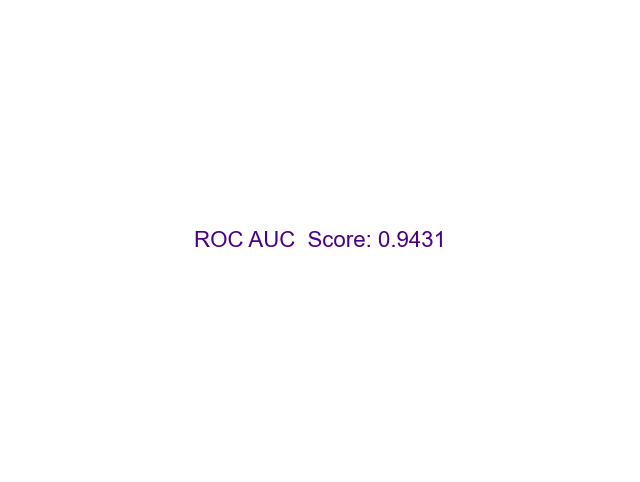

In [43]:
plt.figure(figsize=(8,6))
roc_auc = roc_auc_score(y_test, pred1)
plt.plot([])
plt.text(0,0, f'ROC AUC  Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center',color="indigo")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()


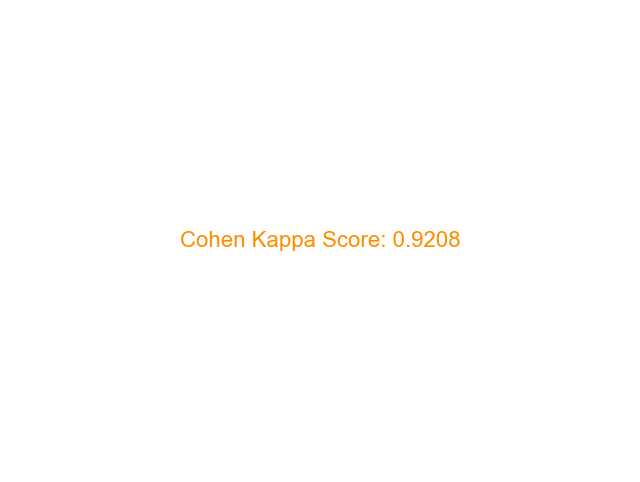

In [44]:
plt.figure(figsize=(8,6))
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test,pred1)
plt.plot([])
plt.text(0,0, f'Cohen Kappa Score: {kappa:.4f}', fontsize=16, ha='center', va='center',color="darkorange")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

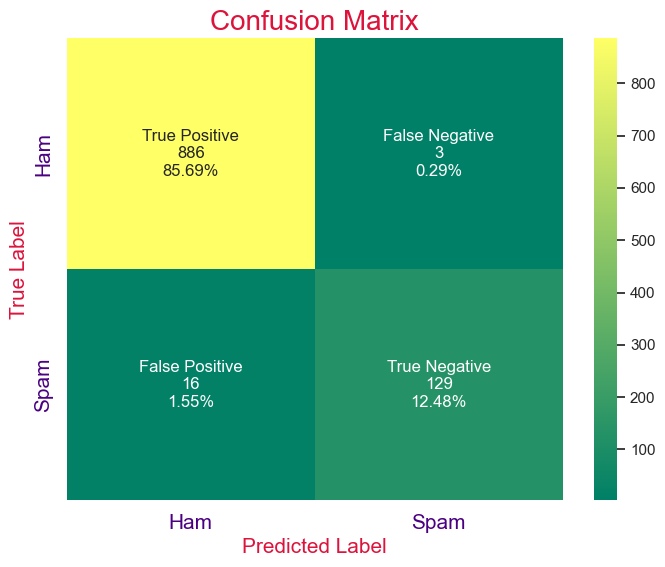

In [45]:
my_label_data=["Ham","Spam"]
my_matrix= confusion_matrix(y_test,pred1)
my_label = ["True Positive","False Negative","False Positive","True Negative"]
my_label_count=["{0:0.0f}".format(value) for value in my_matrix.flatten()]
percentage=["{0:.2%}".format(value) for value in my_matrix.flatten()/np.sum(my_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(my_label,my_label_count,percentage)]
labels=np.asarray(labels).reshape(2, 2)
# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(my_matrix, annot=labels, cmap="summer", fmt="", cbar=True,
            xticklabels=my_label_data,yticklabels=my_label_data)
plt.xlabel("Predicted Label",fontsize=15,color="crimson")
plt.ylabel("True Label",fontsize=15,color="crimson")
plt.title("Confusion Matrix",fontsize=20,color="crimson")
plt.xticks(fontsize=15,color="indigo")
plt.yticks(fontsize=15,color="indigo")
plt.show()

In [46]:
print(classification_report(y_test,pred1,target_names=my_label_data))

              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       889
        Spam       0.98      0.89      0.93       145

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [48]:
pip install yellowbrick



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   -------------------------------------- 282.6/282.6 kB 726.3 kB/s eta 0:00:00


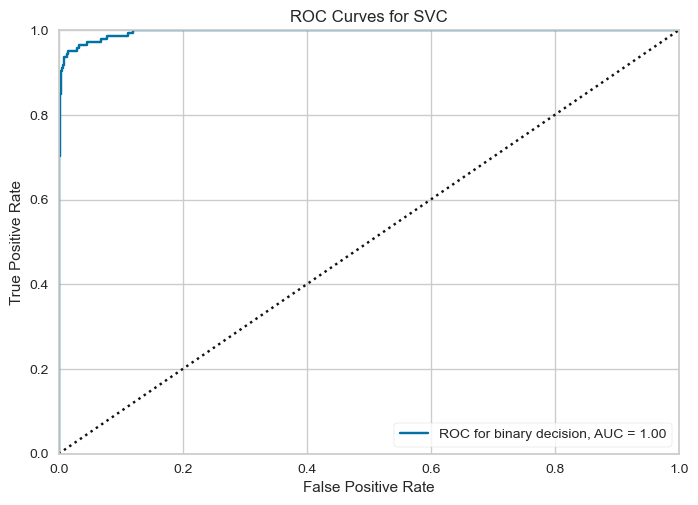

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [49]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(svm, classes=["ham", "spam"], binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [53]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
pred2 = bnb.predict(X_test)

acc1= accuracy_score(y_test,pred2)
print("Bernoulli Naive Bayes Accuracy:",acc1)

Bernoulli Naive Bayes Accuracy: 0.971953578336557


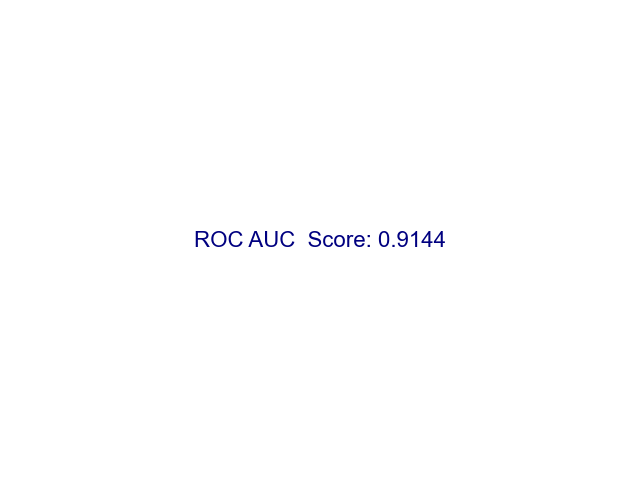

In [54]:
plt.figure(figsize=(8,6))
roc_auc = roc_auc_score(y_test, pred2)
plt.plot([])
plt.text(0,0, f'ROC AUC  Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center',color="navy")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

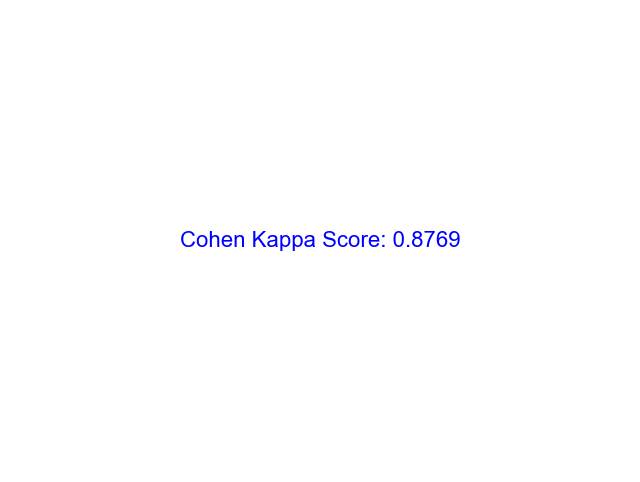

In [55]:
plt.figure(figsize=(8,6))
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test,pred2)
plt.plot([])
plt.text(0,0, f'Cohen Kappa Score: {kappa:.4f}', fontsize=16, ha='center', va='center',color="blue")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

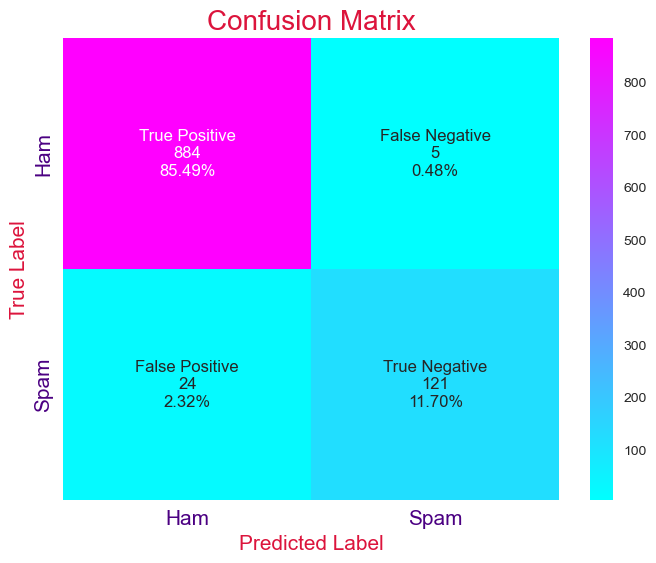

In [56]:
my_label_data=["Ham","Spam"]
my_matrix= confusion_matrix(y_test,pred2)
my_label = ["True Positive","False Negative","False Positive","True Negative"]
my_label_count=["{0:0.0f}".format(value) for value in my_matrix.flatten()]
percentage=["{0:.2%}".format(value) for value in my_matrix.flatten()/np.sum(my_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(my_label,my_label_count,percentage)]
labels=np.asarray(labels).reshape(2, 2)
# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(my_matrix, annot=labels, cmap="cool", fmt="", cbar=True,
            xticklabels=my_label_data,yticklabels=my_label_data)
plt.xlabel("Predicted Label",fontsize=15,color="crimson")
plt.ylabel("True Label",fontsize=15,color="crimson")
plt.title("Confusion Matrix",fontsize=20,color="crimson")
plt.xticks(fontsize=15,color="indigo")
plt.yticks(fontsize=15,color="indigo")
plt.show()

In [57]:
print(classification_report(y_test,pred2,target_names=my_label_data))

              precision    recall  f1-score   support

         Ham       0.97      0.99      0.98       889
        Spam       0.96      0.83      0.89       145

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



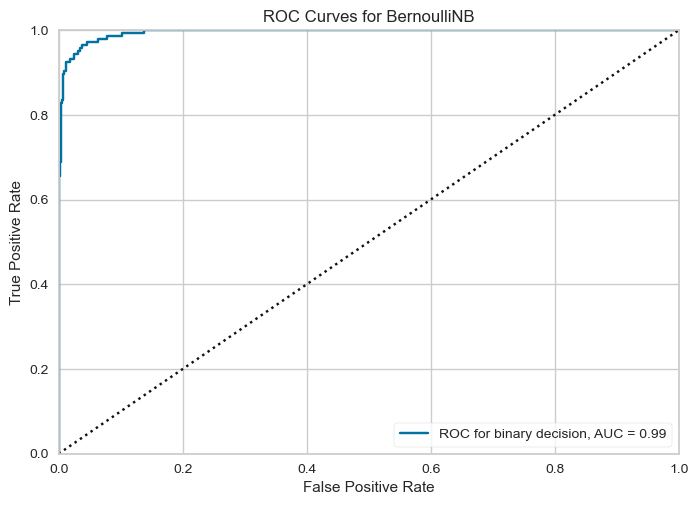

<AxesSubplot:title={'center':'ROC Curves for BernoulliNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [58]:
visualizer = ROCAUC(bnb, classes=["ham", "spam"], binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [59]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred3 = mnb.predict(X_test)

acc2 = accuracy_score(y_test, pred3)
print("Multinomial Naive Bayes Accuracy:",acc2)

Multinomial Naive Bayes Accuracy: 0.9680851063829787


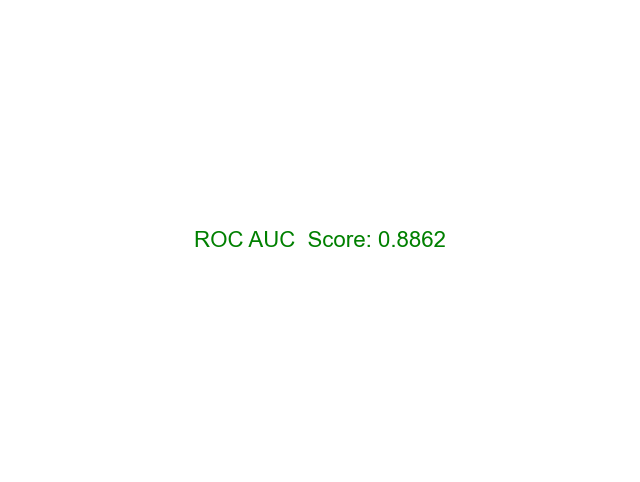

In [60]:
plt.figure(figsize=(8,6))
roc_auc = roc_auc_score(y_test, pred3)
plt.plot([])
plt.text(0,0, f'ROC AUC  Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center',color="green")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

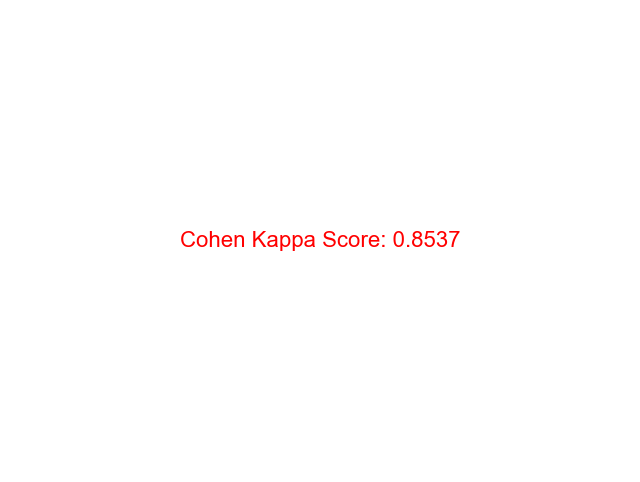

In [61]:
plt.figure(figsize=(8,6))
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test,pred3)
plt.plot([])
plt.text(0,0, f'Cohen Kappa Score: {kappa:.4f}', fontsize=16, ha='center', va='center',color="red")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

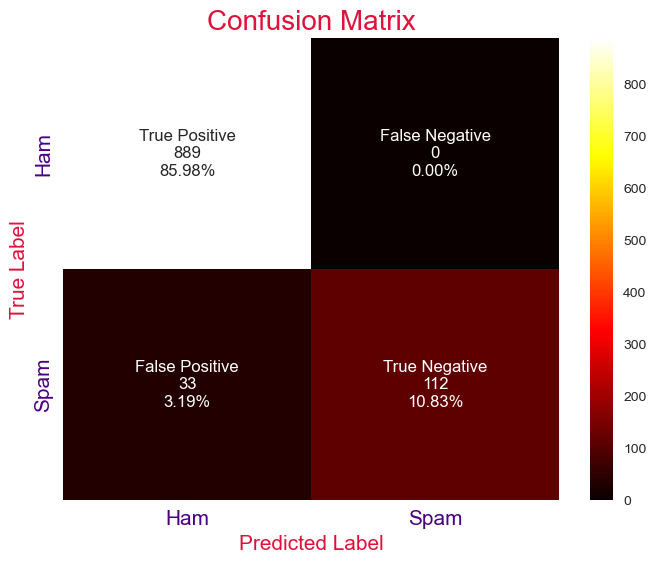

In [62]:
my_label_data=["Ham","Spam"]
my_matrix= confusion_matrix(y_test,pred3)
my_label = ["True Positive","False Negative","False Positive","True Negative"]
my_label_count=["{0:0.0f}".format(value) for value in my_matrix.flatten()]
percentage=["{0:.2%}".format(value) for value in my_matrix.flatten()/np.sum(my_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(my_label,my_label_count,percentage)]
labels=np.asarray(labels).reshape(2, 2)
# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(my_matrix, annot=labels, cmap="hot", fmt="", cbar=True,
            xticklabels=my_label_data,yticklabels=my_label_data)
plt.xlabel("Predicted Label",fontsize=15,color="crimson")
plt.ylabel("True Label",fontsize=15,color="crimson")
plt.title("Confusion Matrix",fontsize=20,color="crimson")
plt.xticks(fontsize=15,color="indigo")
plt.yticks(fontsize=15,color="indigo")
plt.show()

In [63]:
print(classification_report(y_test,pred3,target_names=my_label_data))

              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       889
        Spam       1.00      0.77      0.87       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



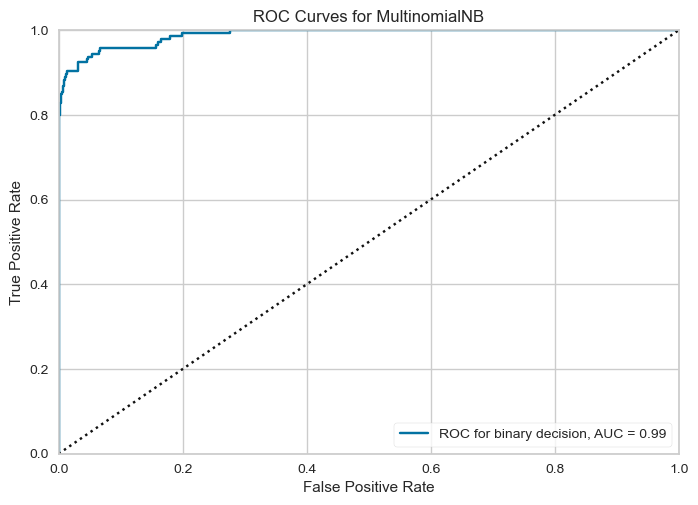

<AxesSubplot:title={'center':'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [64]:
visualizer = ROCAUC(mnb, classes=["ham", "spam"], binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

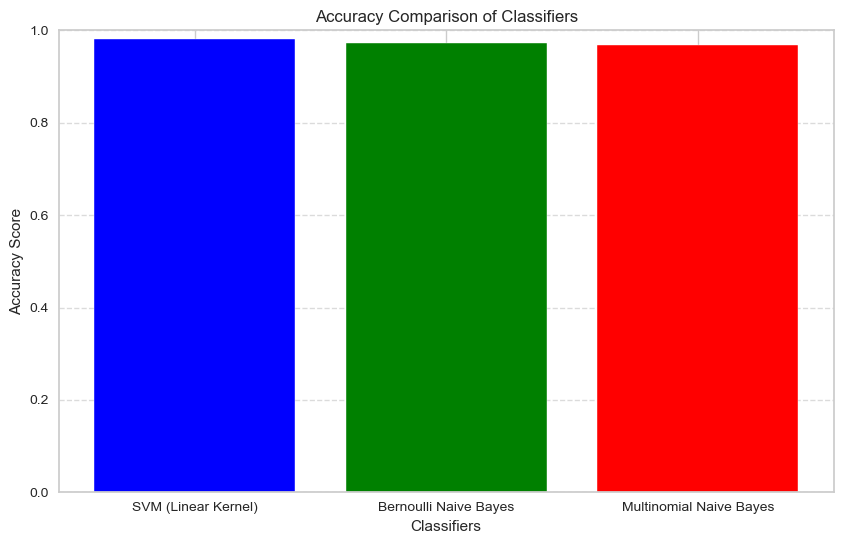

In [65]:
accuracy_scores = [acc0, acc1, acc2]
classifiers = ['SVM (Linear Kernel)', 'Bernoulli Naive Bayes', 'Multinomial Naive Bayes']

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison of Classifiers')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 as accuracy scores are in that range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [66]:
custom_data = ["Banks rarely text their customers with important information or updates. Scammers frequently pose as banks to trick customers into revealing valuable information.Example: ACTION REQUIRED. Please verify your Bank of America account information to avoid a hold on your account. Click here to confirm: [Link]"]

custom_data_transformed = tf.transform(custom_data)


predictions = mnb.predict(custom_data_transformed)

if predictions==0:
    print("Message is Ham")
else:
    print("Message is Spam")

Message is Ham
